# Assignment 4B: 4th Network
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### As we have created our 3rd network. In this Assignment we are going to make at most 3 more changes to achieve two goals.
*  ### Further 1st to reduce no of parameter
* ### 2nd to increase accuracy to 99.4% 

### So to achieve the goal lets first install keras library with which we are going to build the model and  import all pakages from keras with which we are going to build the CNN model

In [1]:
# https://keras.io/
!pip install -q keras
import keras

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


### Now we are going to load the pre-shuffled MNIST data. Out of total 70k data we have 60k hand written image as train data and 10k hand written image as test data which is autometically predefined in mnist dataset.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


### Let's see how our MNIST data looks like in below. Here we can see the 5th hand written digit in X_train as 2 in the displayed image.

(60000, 28, 28)


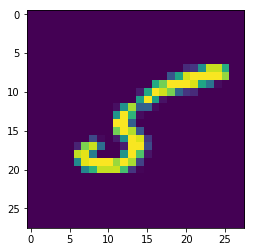

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[11])

### Now we have to shape all the image size in test and train so that we can apply out CNN model based on the input image shape and we will not have any problem while testing with test images with same shape. Let's shape train and test data to (28 , 28 , 1) which is going to be the input dimension of our model.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Here in the below section we are going to scale our pixel values to 0-1 as grey scale pixel lies between 0-255. So to train a robust we must scale the pixcel values.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Let's see how Y looks like as Y values are the actual no corrosponding to an hand written image.

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### Now we have to convert Y values from 1-dimentional class matrix to 10 dimentional class matrix so that we can predict out of 10 class which class it is predicting.

In [7]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Now let's build our CNN model which we are going to apply on our train data for training the model later. Here we are going to use 2-D convolution, maxpooling, dropout, batch normalization and softmax activation function to get output.

In [38]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(12, 3, 3, activation='relu', input_shape=(28,28,1)))#26
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(15, 3, 3, activation='relu'))#24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, 3, activation='relu'))#22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(12, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(12, 3, 3, activation='relu'))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(15, 3, 3, activation='relu'))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, 3, activation='relu'))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu'))#5
model.add(Convolution2D(10, 5, 5))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (1, 1), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Con

### Here in the model summary we can see that out total no of model parameter is 18.6k which is way less than our 1st vanilla model.

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 26, 26, 12)        120       
_________________________________________________________________
batch_normalization_43 (Batc (None, 26, 26, 12)        48        
_________________________________________________________________
dropout_43 (Dropout)         (None, 26, 26, 12)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 24, 24, 15)        1635      
_________________________________________________________________
batch_normalization_44 (Batc (None, 24, 24, 15)        60        
_________________________________________________________________
dropout_44 (Dropout)         (None, 24, 24, 15)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 22, 22, 20)        2720      
__________

### Lets's compile the model with adam optimizer ,loss as cross entropy and validation matrix as accuracy. After compiling the model we are going to train it with training data and let's see how much training accuracy we get after training completion. Here we have used batch size as 512 and total no of epoch 40 to train the model.

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.32 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [41]:
model.fit(X_train, Y_train, batch_size=512, epochs=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 10s 160us/step - loss: 0.4608 - acc: 0.8560 - val_loss: 0.0858 - val_acc: 0.9703
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022727273.
60000/60000 [==============================] - 4s 63us/step - loss: 0.0874 - acc: 0.9727 - val_loss: 0.0522 - val_acc: 0.9833
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018292683.
60000/60000 [==============================] - 4s 63us/step - loss: 0.0634 - acc: 0.9800 - val_loss: 0.0446 - val_acc: 0.9861
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015306122.
60000/60000 [==============================] - 4s 63us/step - loss: 0.0544 - acc: 0.9829 - val_loss: 0.0375 - val_acc: 0.9883
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013157895.
60000/60000 [========

In [42]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.025777660852935515, 0.993]


#### In this model first we can see we have achieved maximum of 99.41% validation accuracy in 38th epoch out of 40. As we can see we have introduced learning rate optimization, increased batch size to 512. Total global receptive field for this network is 25. Here are few observations:
* #### Here we can see we have increased no of parameter from 12.5k to 13.5k from our previous model to achieve 99.4% accuracy.
* #### Also, we can see after introducing learning rate optimization accuracy increased from 99.29 to 99.41. It is going to reduce learning rate with each epoch.
* #### We have also increased batch size from 128 to 512 which has introduced a lot of variation in each batch because of which model has performed better.

#### Finally we have reached 99.4% accuracy with 13.5k parameter.